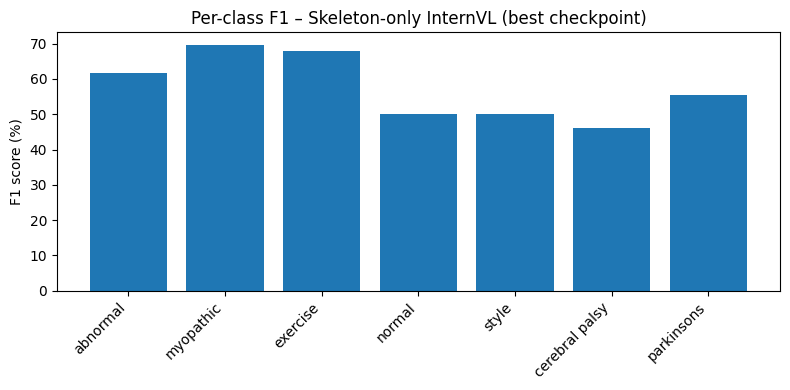

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

classes = [
    "abnormal",
    "myopathic",
    "exercise",
    "normal",
    "style",
    "cerebral palsy",
    "parkinsons",
]

f1_scores = np.array([
    61.64,
    69.70,
    67.92,
    50.00,
    50.00,
    46.15,
    55.56,
])

plt.figure(figsize=(8, 4))
plt.bar(classes, f1_scores)
plt.xticks(rotation=45, ha="right")
plt.ylabel("F1 score (%)")
plt.title("Per-class F1 – Skeleton-only InternVL (best checkpoint)")
plt.tight_layout()
plt.show()

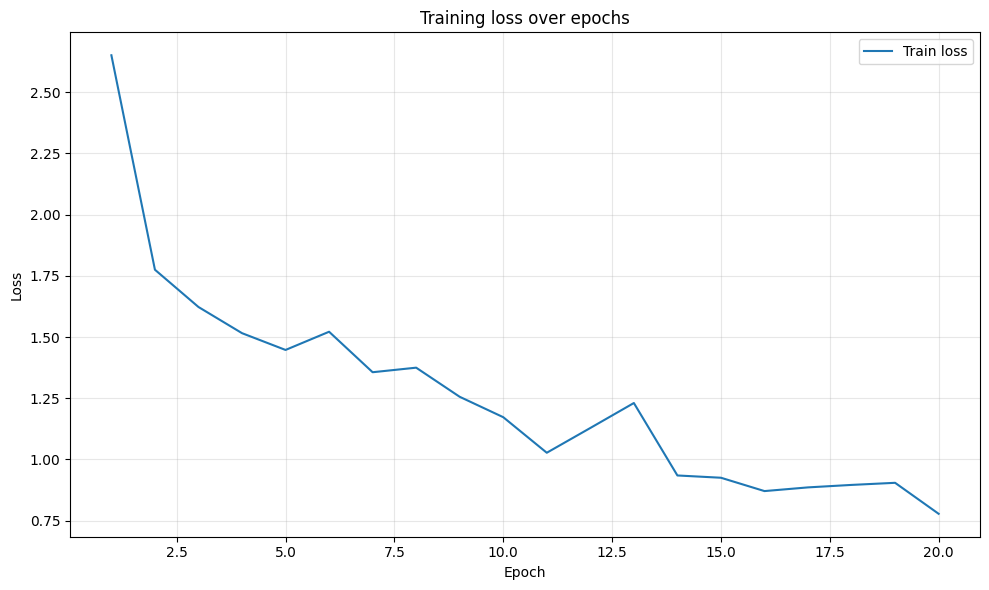

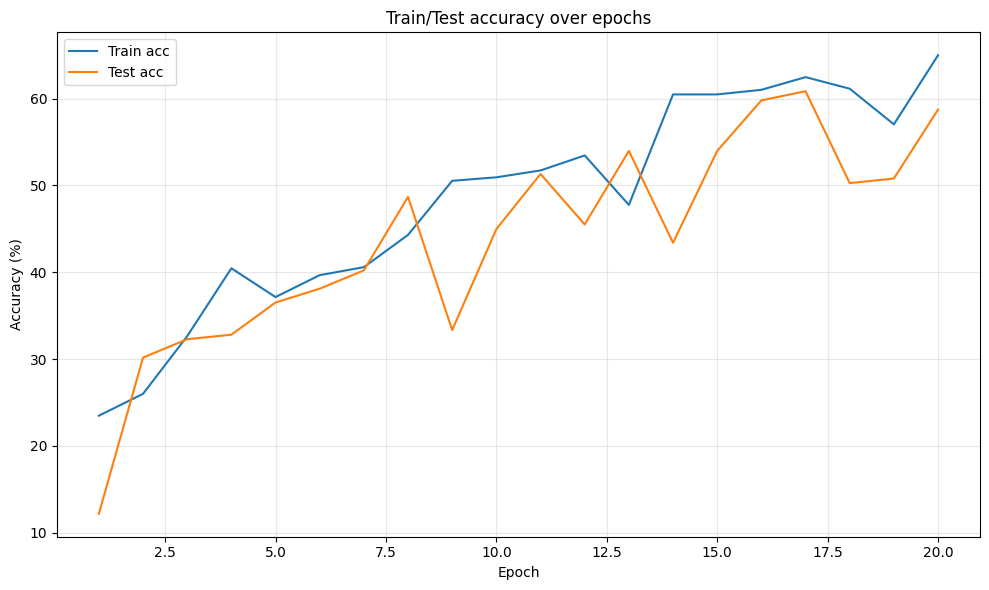

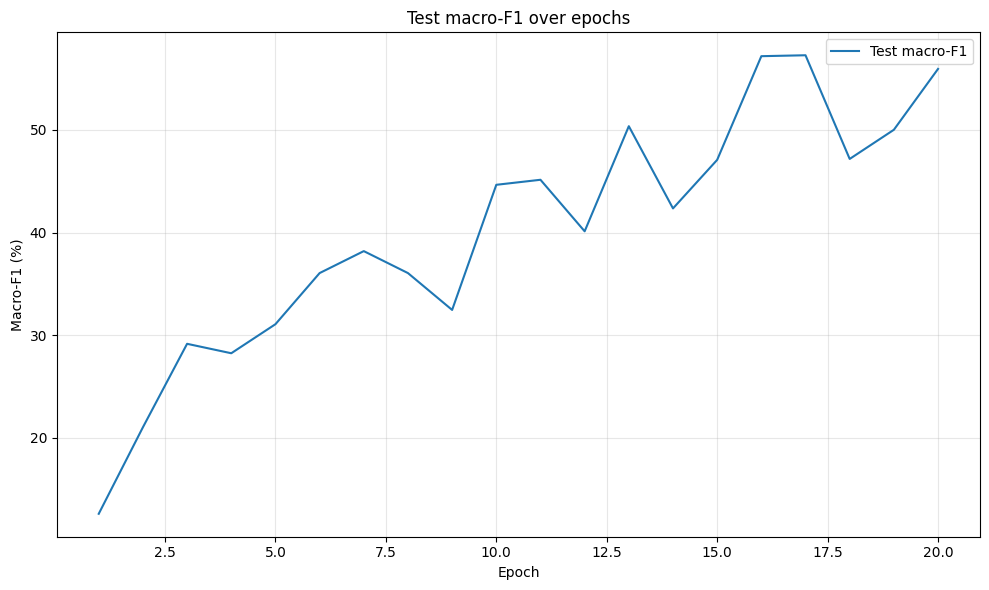

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Hard-coded training history from terminal logs (epochs 1-20)
train_loss = [
    2.6512, 1.7750, 1.6227, 1.5158, 1.4472,
    1.5216, 1.3562, 1.3748, 1.2558, 1.1725,
    1.0272, 1.1284, 1.2304, 0.9344, 0.9251,
    0.8706, 0.8857, 0.8958, 0.9044, 0.7778,
]

train_acc = [
    23.47, 25.99, 32.63, 40.45, 37.14,
    39.66, 40.58, 44.30, 50.53, 50.93,
    51.72, 53.45, 47.75, 60.48, 60.48,
    61.01, 62.47, 61.14, 57.03, 64.99,
]

test_acc = [
    12.17, 30.16, 32.28, 32.80, 36.51,
    38.10, 40.21, 48.68, 33.33, 44.97,
    51.32, 45.50, 53.97, 43.39, 53.97,
    59.79, 60.85, 50.26, 50.79, 58.73,
]

macro_f1 = [
    12.61, 21.04, 29.17, 28.25, 31.08,
    36.06, 38.20, 36.06, 32.47, 44.66,
    45.15, 40.13, 50.37, 42.36, 47.09,
    57.19, 57.28, 47.18, 50.02, 55.95,
]

epochs = np.arange(1, len(train_loss) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, label="Train loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training loss over epochs")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_acc, label="Train acc")
plt.plot(epochs, test_acc, label="Test acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("Train/Test accuracy over epochs")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(epochs, macro_f1, label="Test macro-F1")
plt.xlabel("Epoch")
plt.ylabel("Macro-F1 (%)")
plt.title("Test macro-F1 over epochs")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


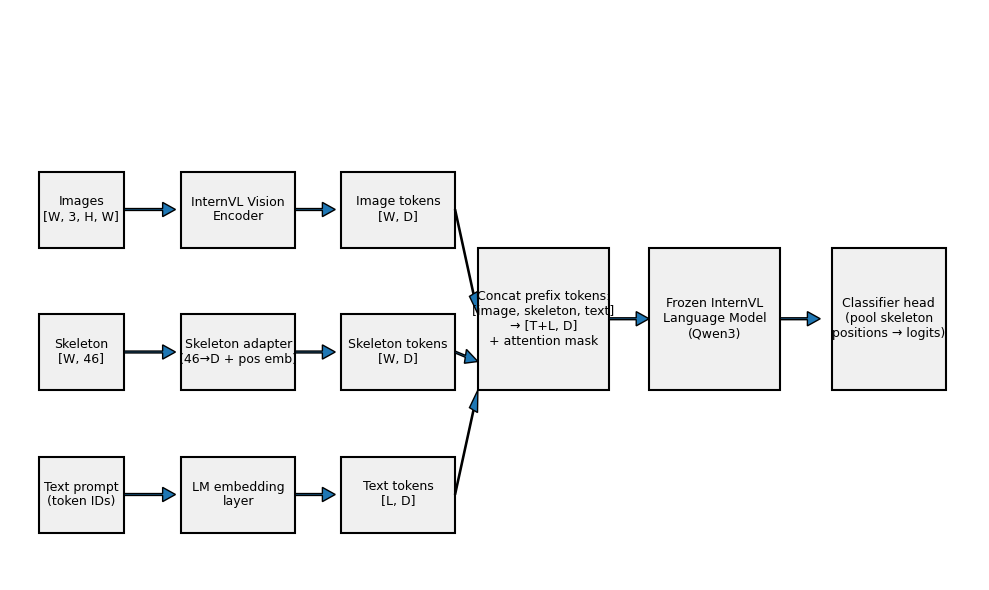

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch, FancyArrow

fig, ax = plt.subplots(figsize=(11, 6))
ax.axis("off")

# Colors
FROZEN_COLOR = "#d0e7ff"    # light blue
TRAINABLE_COLOR = "#ffe0b3"  # light orange
NEUTRAL_COLOR = "#f0f0f0"    # grey

# Helper to draw a rounded box
def rbox(x, y, w, h, text, color):
    rect = FancyBboxPatch(
        (x, y), w, h,
        boxstyle="round,pad=0.2",
        linewidth=1.5,
        edgecolor="black",
        facecolor=color,
    )
    ax.add_patch(rect)
    ax.text(x + w/2, y + h/2, text, ha="center", va="center", fontsize=9, wrap=True)

# Inputs (neutral)
rbox(0.5, 3.5, 1.8, 0.8, "Images\n[W, 3, H, W]", NEUTRAL_COLOR)
rbox(0.5, 2.0, 1.8, 0.8, "Skeleton\n[W, 46]", NEUTRAL_COLOR)
rbox(0.5, 0.5, 1.8, 0.8, "Text prompt\n(token IDs)", NEUTRAL_COLOR)

# Image path (frozen vision encoder)
rbox(3.0, 3.5, 2.2, 0.8, "InternVL Vision\nEncoder\n(frozen)", FROZEN_COLOR)
rbox(5.8, 3.5, 2.0, 0.8, "Image tokens\n[W, D]", NEUTRAL_COLOR)

# Skeleton path (trainable adapter)
rbox(3.0, 2.0, 2.2, 0.8, "Skeleton adapter\n(46→D + pos emb)\n(trainable)", TRAINABLE_COLOR)
rbox(5.8, 2.0, 2.0, 0.8, "Skeleton tokens\n[W, D]", NEUTRAL_COLOR)

# Text path (frozen embedding layer)
rbox(3.0, 0.5, 2.2, 0.8, "LM embedding\nlayer\n(frozen)", FROZEN_COLOR)
rbox(5.8, 0.5, 2.0, 0.8, "Text tokens\n[L, D]", NEUTRAL_COLOR)

# Fusion + LM + classifier
rbox(8.2, 2.0, 3.0, 1.5, "Concat prefix tokens:\n[image, skeleton, text]\n→ [T+L, D]\n+ attention mask", NEUTRAL_COLOR)
rbox(11.8, 2.0, 2.3, 1.5, "Frozen InternVL\nLanguage Model\n(Qwen3)", FROZEN_COLOR)
rbox(14.7, 2.0, 2.2, 1.5, "Classifier head\n(trainable)\n(pool skeleton\npositions → logits)", TRAINABLE_COLOR)

# Arrows from inputs to modules
ax.add_patch(FancyArrow(2.3, 3.9, 0.7, 0.0, width=0.02, head_width=0.15, length_includes_head=True))  # image → vision
ax.add_patch(FancyArrow(2.3, 2.4, 0.7, 0.0, width=0.02, head_width=0.15, length_includes_head=True))  # skeleton → adapter
ax.add_patch(FancyArrow(2.3, 0.9, 0.7, 0.0, width=0.02, head_width=0.15, length_includes_head=True))  # text → emb

# Arrows along paths
ax.add_patch(FancyArrow(5.2, 3.9, 0.6, 0.0, width=0.02, head_width=0.15, length_includes_head=True))  # vision → img tokens
ax.add_patch(FancyArrow(5.2, 2.4, 0.6, 0.0, width=0.02, head_width=0.15, length_includes_head=True))  # adapter → skel tokens
ax.add_patch(FancyArrow(5.2, 0.9, 0.6, 0.0, width=0.02, head_width=0.15, length_includes_head=True))  # emb → text tokens

# Arrows into fusion
ax.add_patch(FancyArrow(7.8, 3.9, 0.4, -1.1, width=0.02, head_width=0.15, length_includes_head=True))  # img → fusion
ax.add_patch(FancyArrow(7.8, 2.4, 0.4, -0.1, width=0.02, head_width=0.15, length_includes_head=True))  # skel → fusion
ax.add_patch(FancyArrow(7.8, 0.9, 0.4, 1.1, width=0.02, head_width=0.15, length_includes_head=True))  # text → fusion

# Fusion → LM → classifier
ax.add_patch(FancyArrow(11.2, 2.75, 0.6, 0.0, width=0.02, head_width=0.15, length_includes_head=True))
ax.add_patch(FancyArrow(14.1, 2.75, 0.6, 0.0, width=0.02, head_width=0.15, length_includes_head=True))

ax.set_xlim(0, 18)
ax.set_ylim(0, 6)
plt.tight_layout()
plt.show()


C:\Users\1nkas-Strix-4090-ll\AppData\Local\Temp\ipykernel_31532\3562218359.py:60: UserWarning: Glyph 129482 (\N{ICE CUBE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\1nkas-Strix-4090-ll\AppData\Local\Temp\ipykernel_31532\3562218359.py:60: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\1nkas-Strix-4090-ll\miniconda3\envs\internvl-gait\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129482 (\N{ICE CUBE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\1nkas-Strix-4090-ll\miniconda3\envs\internvl-gait\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


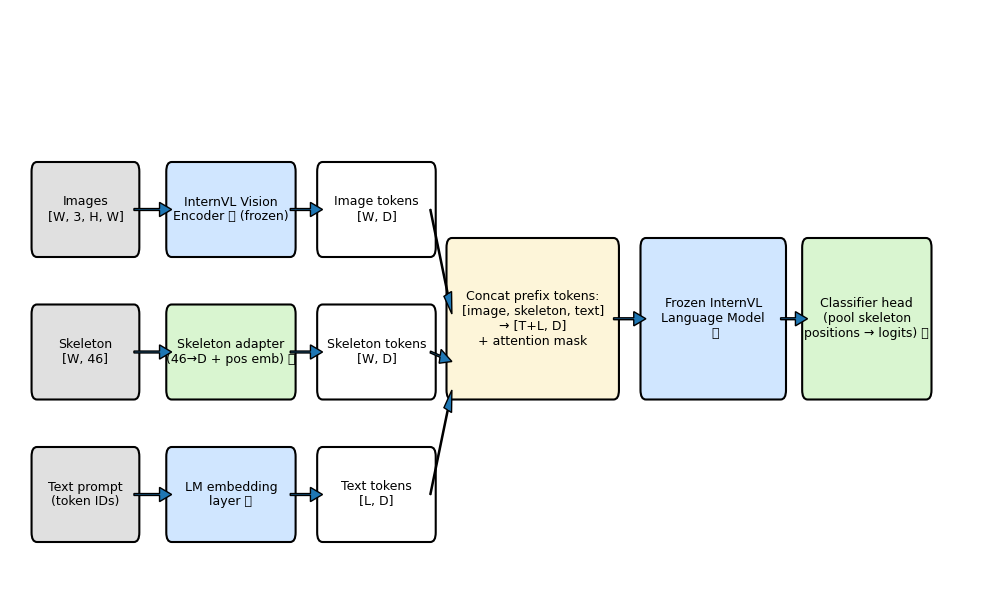

In [11]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch, FancyArrow

fig, ax = plt.subplots(figsize=(10, 6))
ax.axis("off")

# Helper to draw a rounded box with color and emoji label
def box(x, y, w, h, text, facecolor="#f0f0f0"):
    rect = FancyBboxPatch(
        (x, y), w, h,
        boxstyle="round,pad=0.1", linewidth=1.5,
        edgecolor="black", facecolor=facecolor,
    )
    ax.add_patch(rect)
    ax.text(x + w/2, y + h/2, text, ha="center", va="center", fontsize=9, wrap=True)

# Inputs (gray)
box(0.5, 3.5, 1.8, 0.8, "Images\n[W, 3, H, W]", facecolor="#e0e0e0")
box(0.5, 2.0, 1.8, 0.8, "Skeleton\n[W, 46]", facecolor="#e0e0e0")
box(0.5, 0.5, 1.8, 0.8, "Text prompt\n(token IDs)", facecolor="#e0e0e0")

# Image path (frozen 🧊)
box(3.0, 3.5, 2.2, 0.8, "InternVL Vision\nEncoder 🧊 (frozen)", facecolor="#d0e6ff")
box(5.8, 3.5, 2.0, 0.8, "Image tokens\n[W, D]", facecolor="#ffffff")

# Skeleton path (trainable 🟢)
box(3.0, 2.0, 2.2, 0.8, "Skeleton adapter\n(46→D + pos emb) 🟢", facecolor="#d9f5d0")
box(5.8, 2.0, 2.0, 0.8, "Skeleton tokens\n[W, D]", facecolor="#ffffff")

# Text path (frozen LM embeddings)
box(3.0, 0.5, 2.2, 0.8, "LM embedding\nlayer 🧊", facecolor="#d0e6ff")
box(5.8, 0.5, 2.0, 0.8, "Text tokens\n[L, D]", facecolor="#ffffff")

# Fusion + LM + classifier
box(8.2, 2.0, 3.0, 1.5, "Concat prefix tokens:\n[image, skeleton, text]\n→ [T+L, D]\n+ attention mask", facecolor="#fdf5d9")
box(11.8, 2.0, 2.5, 1.5, "Frozen InternVL\nLanguage Model\n 🧊", facecolor="#d0e6ff")
box(14.8, 2.0, 2.2, 1.5, "Classifier head\n(pool skeleton\npositions → logits) 🟢", facecolor="#d9f5d0")

# Arrows from inputs to modules
ax.add_patch(FancyArrow(2.3, 3.9, 0.7, 0.0, width=0.02, head_width=0.15, length_includes_head=True))  # image → vision
ax.add_patch(FancyArrow(2.3, 2.4, 0.7, 0.0, width=0.02, head_width=0.15, length_includes_head=True))  # skeleton → adapter
ax.add_patch(FancyArrow(2.3, 0.9, 0.7, 0.0, width=0.02, head_width=0.15, length_includes_head=True))  # text → emb

# Arrows along paths
ax.add_patch(FancyArrow(5.2, 3.9, 0.6, 0.0, width=0.02, head_width=0.15, length_includes_head=True))  # vision → img tokens
ax.add_patch(FancyArrow(5.2, 2.4, 0.6, 0.0, width=0.02, head_width=0.15, length_includes_head=True))  # adapter → skel tokens
ax.add_patch(FancyArrow(5.2, 0.9, 0.6, 0.0, width=0.02, head_width=0.15, length_includes_head=True))  # emb → text tokens

# Arrows into fusion
ax.add_patch(FancyArrow(7.8, 3.9, 0.4, -1.1, width=0.02, head_width=0.15, length_includes_head=True))  # img → fusion
ax.add_patch(FancyArrow(7.8, 2.4, 0.4, -0.1, width=0.02, head_width=0.15, length_includes_head=True))  # skel → fusion
ax.add_patch(FancyArrow(7.8, 0.9, 0.4, 1.1, width=0.02, head_width=0.15, length_includes_head=True))  # text → fusion

# Fusion → LM → classifier
ax.add_patch(FancyArrow(11.2, 2.75, 0.6, 0.0, width=0.02, head_width=0.15, length_includes_head=True))
ax.add_patch(FancyArrow(14.3, 2.75, 0.5, 0.0, width=0.02, head_width=0.15, length_includes_head=True))

ax.set_xlim(0, 18)
ax.set_ylim(0, 6)
plt.tight_layout()
plt.show()


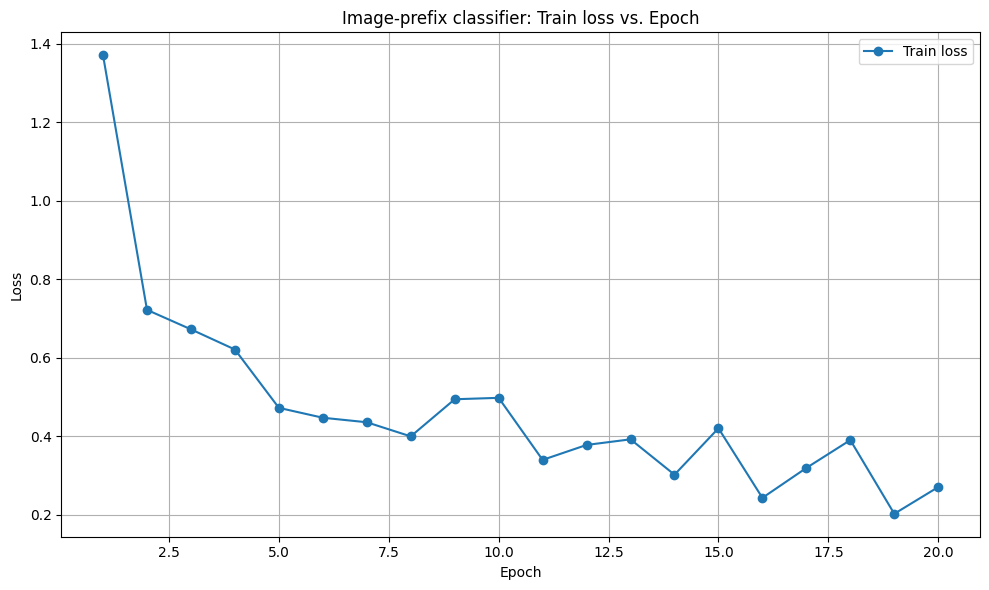

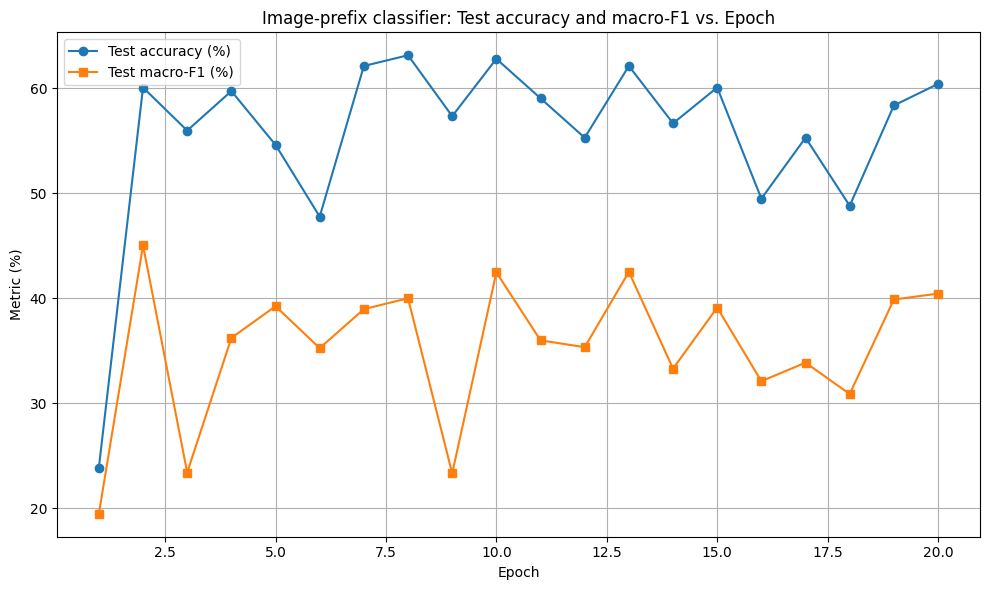

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Epoch indices 1..20
epochs = np.arange(1, 21)

# From your console log (image-prefix-only run)
train_loss = [
    1.3709, 0.7223, 0.6727, 0.6213, 0.4727,
    0.4475, 0.4360, 0.4000, 0.4946, 0.4982,
    0.3401, 0.3782, 0.3925, 0.3024, 0.4207,
    0.2434, 0.3196, 0.3906, 0.2028, 0.2709,
]

test_acc = [  # in %
    23.89, 60.07, 55.97, 59.73, 54.61,
    47.78, 62.12, 63.14, 57.34, 62.80,
    59.04, 55.29, 62.12, 56.66, 60.07,
    49.49, 55.29, 48.81, 58.36, 60.41,
]

test_macro_f1 = [  # in %
    19.49, 45.04, 23.42, 36.23, 39.25,
    35.26, 38.97, 40.01, 23.34, 42.47,
    36.00, 35.35, 42.52, 33.31, 39.12,
    32.11, 33.88, 30.89, 39.89, 40.45,
]

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, marker='o', label='Train loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Image-prefix classifier: Train loss vs. Epoch')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(epochs, test_acc, marker='o', label='Test accuracy (%)')
plt.plot(epochs, test_macro_f1, marker='s', label='Test macro-F1 (%)')
plt.xlabel('Epoch')
plt.ylabel('Metric (%)')
plt.title('Image-prefix classifier: Test accuracy and macro-F1 vs. Epoch')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

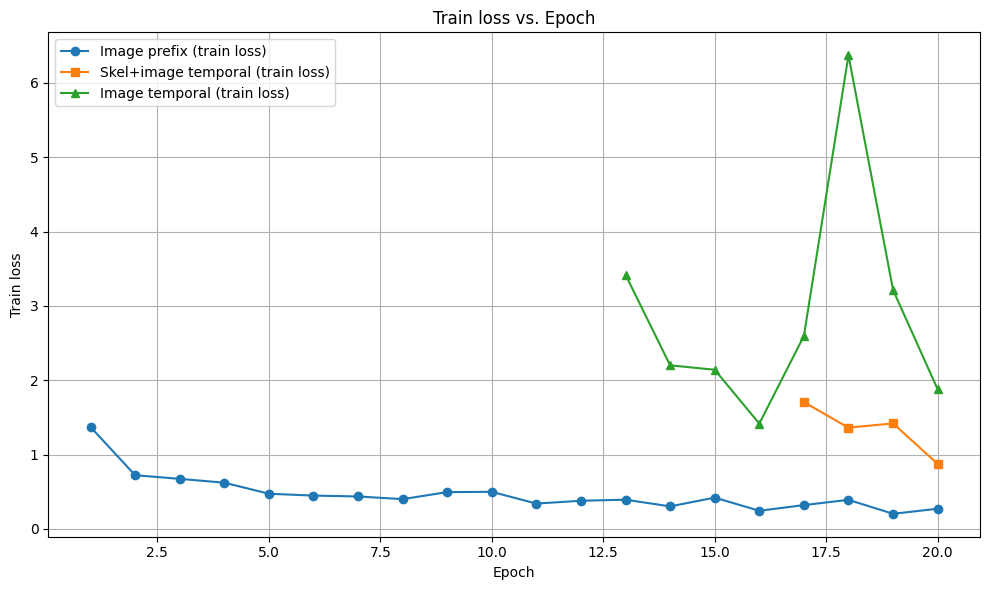

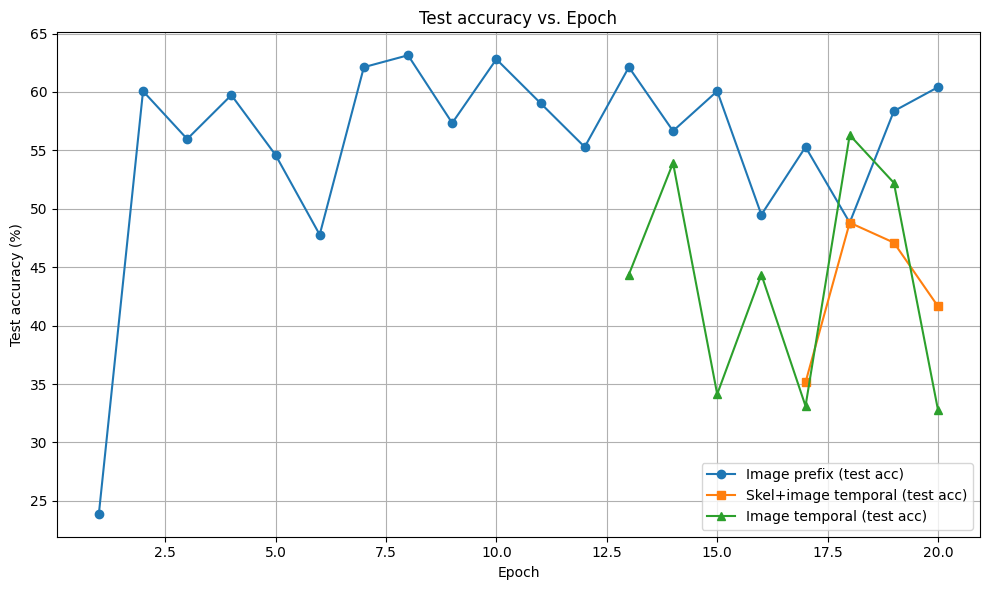

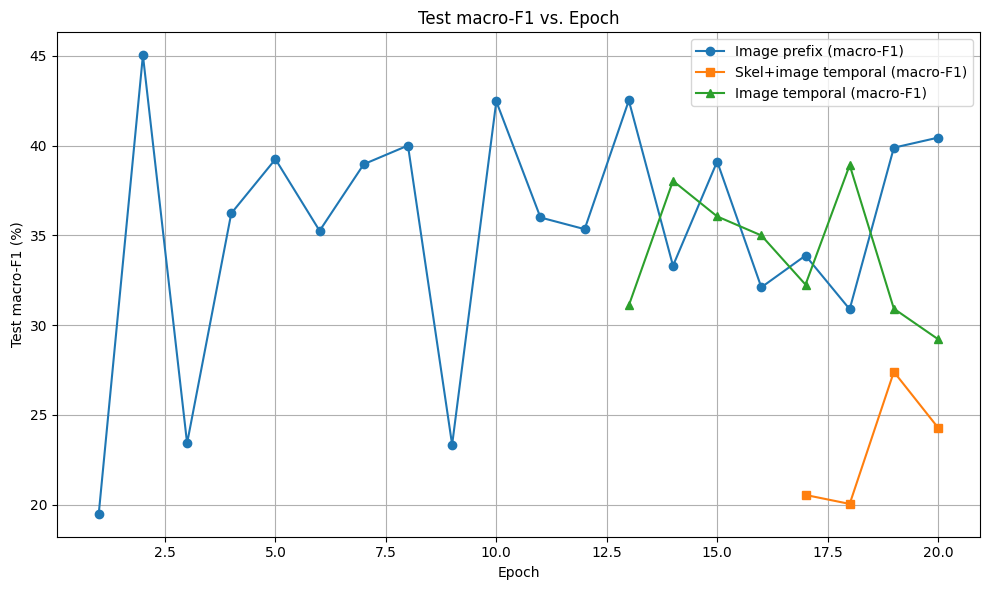

In [2]:
import numpy as np
import matplotlib.pyplot as plt

epochs = np.arange(1, 21)

# ========= 1) IMAGE PREFIX ONLY (image + text, prefix into LLM) =========
img_prefix_train_loss = [
    1.3709, 0.7223, 0.6727, 0.6213, 0.4727,
    0.4475, 0.4360, 0.4000, 0.4946, 0.4982,
    0.3401, 0.3782, 0.3925, 0.3024, 0.4207,
    0.2434, 0.3196, 0.3906, 0.2028, 0.2709,
]

img_prefix_test_acc = [  # %
    23.89, 60.07, 55.97, 59.73, 54.61,
    47.78, 62.12, 63.14, 57.34, 62.80,
    59.04, 55.29, 62.12, 56.66, 60.07,
    49.49, 55.29, 48.81, 58.36, 60.41,
]

img_prefix_test_macro_f1 = [  # %
    19.49, 45.04, 23.42, 36.23, 39.25,
    35.26, 38.97, 40.01, 23.34, 42.47,
    36.00, 35.35, 42.52, 33.31, 39.12,
    32.11, 33.88, 30.89, 39.89, 40.45,
]

# ========= 2) SKELETON + IMAGE + TEMPORAL ENCODER =========
# (we only have epochs 17–20 from the log you pasted)
skel_img_train_loss = [np.nan] * 16 + [
    1.7051,  # 17
    1.3613,  # 18
    1.4188,  # 19
    0.8737,  # 20
]

skel_img_test_acc = [np.nan] * 16 + [
    35.15,  # 17
    48.81,  # 18
    47.10,  # 19
    41.64,  # 20
]

skel_img_test_macro_f1 = [np.nan] * 16 + [
    20.54,  # 17
    20.04,  # 18
    27.40,  # 19
    24.29,  # 20
]

# ========= 3) TEMPORAL IMAGE ONLY (image + temporal encoder, no skeleton) =========
# (we have epochs 13–20 from the resumed run)
img_temp_train_loss = [np.nan] * 12 + [
    3.4180,  # 13
    2.2001,  # 14
    2.1404,  # 15
    1.4158,  # 16
    2.5944,  # 17
    6.3710,  # 18
    3.2136,  # 19
    1.8778,  # 20
]

img_temp_test_acc = [np.nan] * 12 + [
    44.37,  # 13
    53.92,  # 14
    34.13,  # 15
    44.37,  # 16
    33.11,  # 17
    56.31,  # 18
    52.22,  # 19
    32.76,  # 20
]

img_temp_test_macro_f1 = [np.nan] * 12 + [
    31.10,  # 13
    38.04,  # 14
    36.06,  # 15
    35.00,  # 16
    32.26,  # 17
    38.92,  # 18
    30.92,  # 19
    29.22,  # 20
]

# ========= PLOTS =========

plt.figure(figsize=(10, 6))
plt.plot(epochs, img_prefix_train_loss, marker='o', label='Image prefix (train loss)')
plt.plot(epochs, skel_img_train_loss, marker='s', label='Skel+image temporal (train loss)')
plt.plot(epochs, img_temp_train_loss, marker='^', label='Image temporal (train loss)')
plt.xlabel('Epoch')
plt.ylabel('Train loss')
plt.title('Train loss vs. Epoch')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(epochs, img_prefix_test_acc, marker='o', label='Image prefix (test acc)')
plt.plot(epochs, skel_img_test_acc, marker='s', label='Skel+image temporal (test acc)')
plt.plot(epochs, img_temp_test_acc, marker='^', label='Image temporal (test acc)')
plt.xlabel('Epoch')
plt.ylabel('Test accuracy (%)')
plt.title('Test accuracy vs. Epoch')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(epochs, img_prefix_test_macro_f1, marker='o', label='Image prefix (macro-F1)')
plt.plot(epochs, skel_img_test_macro_f1, marker='s', label='Skel+image temporal (macro-F1)')
plt.plot(epochs, img_temp_test_macro_f1, marker='^', label='Image temporal (macro-F1)')
plt.xlabel('Epoch')
plt.ylabel('Test macro-F1 (%)')
plt.title('Test macro-F1 vs. Epoch')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

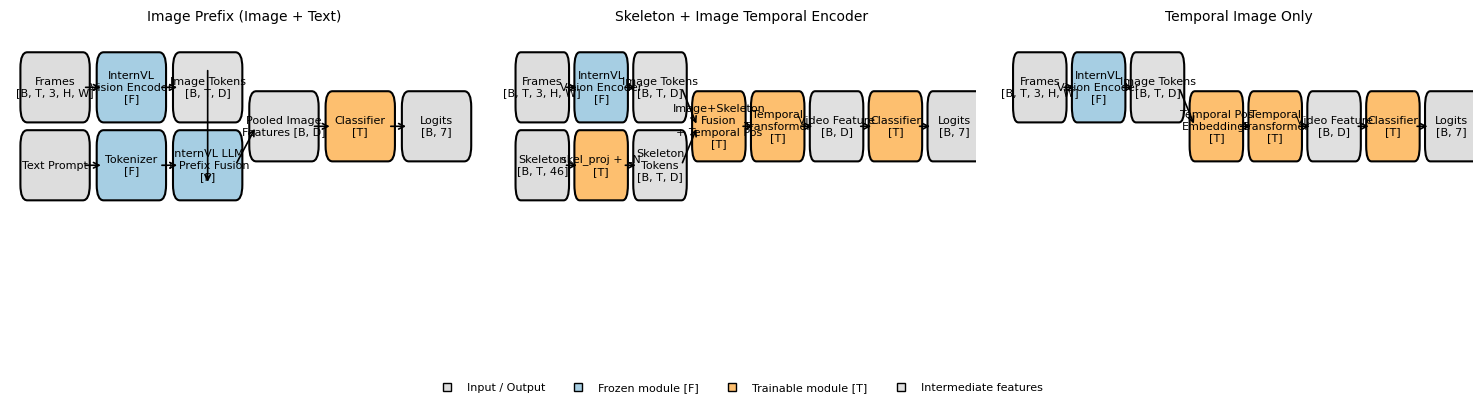

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch
from matplotlib.lines import Line2D

# Simple helper to draw a box with label
def box(ax, xy, w, h, text, fc, ec="black"):
    x, y = xy
    rect = FancyBboxPatch(
        (x, y),
        w,
        h,
        boxstyle="round,pad=0.2",
        linewidth=1.5,
        edgecolor=ec,
        facecolor=fc,
    )
    ax.add_patch(rect)
    ax.text(
        x + w / 2,
        y + h / 2,
        text,
        ha="center",
        va="center",
        fontsize=8,
        wrap=True,
    )

def arrow(ax, x1, y1, x2, y2):
    ax.annotate(
        "",
        xy=(x2, y2),
        xytext=(x1, y1),
        arrowprops=dict(arrowstyle="->", lw=1.2),
    )

# Colors
clr_input = "#DDDDDD"       # grey
clr_frozen = "#A6CEE3"      # blue-ish
clr_train = "#FDBF6F"       # orange-ish
clr_data = "#E0E0E0"

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
titles = [
    "Image Prefix (Image + Text)",
    "Skeleton + Image Temporal Encoder",
    "Temporal Image Only",
]

# -------------------- 1) Image Prefix --------------------
ax = axes[0]
ax.set_title(titles[0], fontsize=10)

# Layout coordinates
w, h = 1.6, 0.5
y0 = 3.5

# Inputs
box(ax, (0, y0), w, h, "Frames\n[B, T, 3, H, W]", clr_input)
box(ax, (0, y0-1.0), w, h, "Text Prompt", clr_input)

# Vision encoder
box(ax, (2.2, y0), w, h, "InternVL\nVision Encoder\n[F]", clr_frozen)
arrow(ax, 0+w, y0+h/2, 2.2, y0+h/2)

# Image tokens
box(ax, (4.4, y0), w, h, "Image Tokens\n[B, T, D]", clr_data)
arrow(ax, 2.2+w, y0+h/2, 4.4, y0+h/2)

# Tokenizer
box(ax, (2.2, y0-1.0), w, h, "Tokenizer\n[F]", clr_frozen)
arrow(ax, 0+w, y0-1.0+h/2, 2.2, y0-1.0+h/2)

# LLM + prefix fusion
box(ax, (4.4, y0-1.0), w, h, "InternVL LLM\n+ Prefix Fusion\n[F]", clr_frozen)
arrow(ax, 2.2+w, y0-1.0+h/2, 4.4, y0-1.0+h/2)
arrow(ax, 4.4+w/2, y0+h, 4.4+w/2, y0-1.0)  # image tokens -> LLM

# Pooled image features
box(ax, (6.6, y0-0.5), w, h, "Pooled Image\nFeatures [B, D]", clr_data)
arrow(ax, 4.4+w, y0-1.0+h/2, 6.6, y0-0.5+h/2)

# Classifier
box(ax, (8.8, y0-0.5), w, h, "Classifier\n[T]", clr_train)
arrow(ax, 6.6+w, y0-0.5+h/2, 8.8, y0-0.5+h/2)

# Output
box(ax, (11.0, y0-0.5), w, h, "Logits\n[B, 7]", clr_input)
arrow(ax, 8.8+w, y0-0.5+h/2, 11.0, y0-0.5+h/2)

ax.set_xlim(-0.5, 13)
ax.set_ylim(0, 4.5)
ax.axis("off")

# -------------------- 2) Skeleton + Image Temporal --------------------
ax = axes[1]
ax.set_title(titles[1], fontsize=10)

y0 = 3.5

# Inputs
box(ax, (0, y0), w, h, "Frames\n[B, T, 3, H, W]", clr_input)
box(ax, (0, y0-1.0), w, h, "Skeleton\n[B, T, 46]", clr_input)

# Vision encoder (frozen)
box(ax, (2.2, y0), w, h, "InternVL\nVision Encoder\n[F]", clr_frozen)
arrow(ax, 0+w, y0+h/2, 2.2, y0+h/2)

# Image tokens
box(ax, (4.4, y0), w, h, "Image Tokens\n[B, T, D]", clr_data)
arrow(ax, 2.2+w, y0+h/2, 4.4, y0+h/2)

# Skeleton projection (trainable)
box(ax, (2.2, y0-1.0), w, h, "skel_proj + LN\n[T]", clr_train)
arrow(ax, 0+w, y0-1.0+h/2, 2.2, y0-1.0+h/2)

box(ax, (4.4, y0-1.0), w, h, "Skeleton\nTokens\n[B, T, D]", clr_data)
arrow(ax, 2.2+w, y0-1.0+h/2, 4.4, y0-1.0+h/2)

# Fusion + temporal
box(ax, (6.6, y0-0.5), w, h, "Image+Skeleton\nFusion\n+ Temporal Pos\n[T]", clr_train)
arrow(ax, 4.4+w, y0+h/2, 6.6, y0-0.5+h/2)    # from image tokens
arrow(ax, 4.4+w, y0-1.0+h/2, 6.6, y0-0.5+h/2) # from skeleton tokens

box(ax, (8.8, y0-0.5), w, h, "Temporal\nTransformer\n[T]", clr_train)
arrow(ax, 6.6+w, y0-0.5+h/2, 8.8, y0-0.5+h/2)

# Pooled video feature
box(ax, (11.0, y0-0.5), w, h, "Video Feature\n[B, D]", clr_data)
arrow(ax, 8.8+w, y0-0.5+h/2, 11.0, y0-0.5+h/2)

# Classifier
box(ax, (13.2, y0-0.5), w, h, "Classifier\n[T]", clr_train)
arrow(ax, 11.0+w, y0-0.5+h/2, 13.2, y0-0.5+h/2)

# Output
box(ax, (15.4, y0-0.5), w, h, "Logits\n[B, 7]", clr_input)
arrow(ax, 13.2+w, y0-0.5+h/2, 15.4, y0-0.5+h/2)

ax.set_xlim(-0.5, 17)
ax.set_ylim(0, 4.5)
ax.axis("off")

# -------------------- 3) Temporal Image Only --------------------
ax = axes[2]
ax.set_title(titles[2], fontsize=10)

y0 = 3.5

# Input
box(ax, (0, y0), w, h, "Frames\n[B, T, 3, H, W]", clr_input)

# Vision encoder (frozen)
box(ax, (2.2, y0), w, h, "InternVL\nVision Encoder\n[F]", clr_frozen)
arrow(ax, 0+w, y0+h/2, 2.2, y0+h/2)

# Image tokens
box(ax, (4.4, y0), w, h, "Image Tokens\n[B, T, D]", clr_data)
arrow(ax, 2.2+w, y0+h/2, 4.4, y0+h/2)

# Temporal pos + Transformer (trainable)
box(ax, (6.6, y0-0.5), w, h, "Temporal Pos\nEmbeddings\n[T]", clr_train)
arrow(ax, 4.4+w, y0+h/2, 6.6, y0-0.5+h/2)

box(ax, (8.8, y0-0.5), w, h, "Temporal\nTransformer\n[T]", clr_train)
arrow(ax, 6.6+w, y0-0.5+h/2, 8.8, y0-0.5+h/2)

# Pooled video feature
box(ax, (11.0, y0-0.5), w, h, "Video Feature\n[B, D]", clr_data)
arrow(ax, 8.8+w, y0-0.5+h/2, 11.0, y0-0.5+h/2)

# Classifier + output
box(ax, (13.2, y0-0.5), w, h, "Classifier\n[T]", clr_train)
arrow(ax, 11.0+w, y0-0.5+h/2, 13.2, y0-0.5+h/2)

box(ax, (15.4, y0-0.5), w, h, "Logits\n[B, 7]", clr_input)
arrow(ax, 13.2+w, y0-0.5+h/2, 15.4, y0-0.5+h/2)

ax.set_xlim(-0.5, 17)
ax.set_ylim(0, 4.5)
ax.axis("off")

# -------------------- Legend --------------------
legend_elements = [
    Line2D([0], [0], color="none", marker="s", markerfacecolor=clr_input, label="Input / Output"),
    Line2D([0], [0], color="none", marker="s", markerfacecolor=clr_frozen, label="Frozen module [F]"),
    Line2D([0], [0], color="none", marker="s", markerfacecolor=clr_train, label="Trainable module [T]"),
    Line2D([0], [0], color="none", marker="s", markerfacecolor=clr_data, label="Intermediate features"),
]
fig.legend(
    handles=legend_elements,
    loc="lower center",
    ncol=4,
    fontsize=8,
    frameon=False,
    bbox_to_anchor=(0.5, -0.02),
)

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

classes = [
    "abnormal",
    "myopathic",
    "exercise",
    "normal",
    "style",
    "cerebral palsy",
    "parkinsons",
]

# Per-class F1 (%) from the mean-pooling image-prefix experiment
f1_mean_pool = np.array([
    77.08,  # abnormal
    55.56,  # myopathic
    75.27,  # exercise
    21.69,  # normal
    0.00,   # style
    0.00,   # cerebral palsy
    85.71,  # parkinsons
])

plt.figure(figsize=(8, 4))
plt.bar(classes, f1_mean_pool, color="#87cefa")
plt.xticks(rotation=45, ha="right")
plt.ylabel("F1 score (%)")
plt.title("Per-class F1 – Image-prefix (mean pooling) experiment")
plt.ylim(0, 100)
plt.tight_layout()
plt.show()


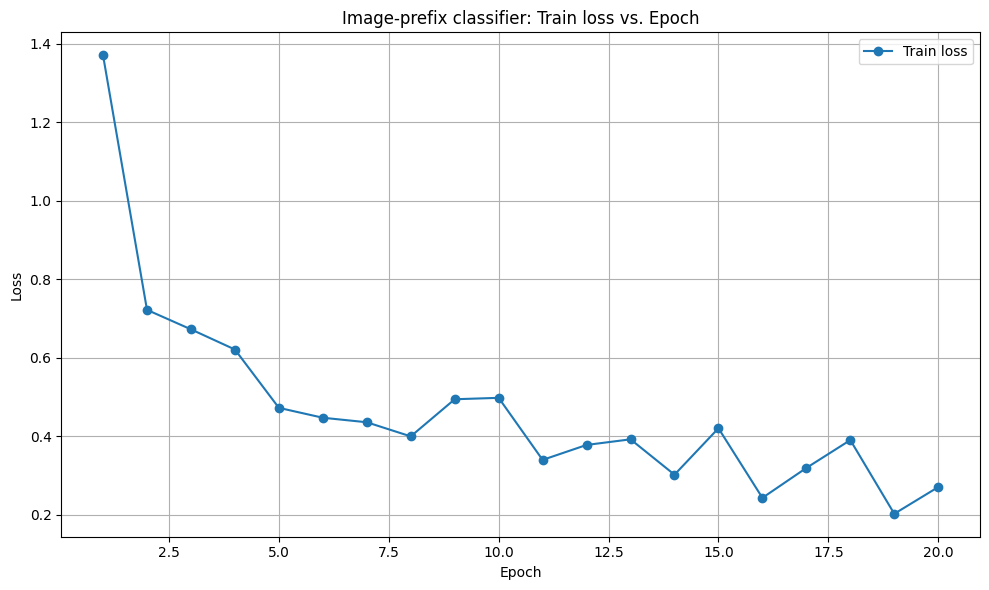

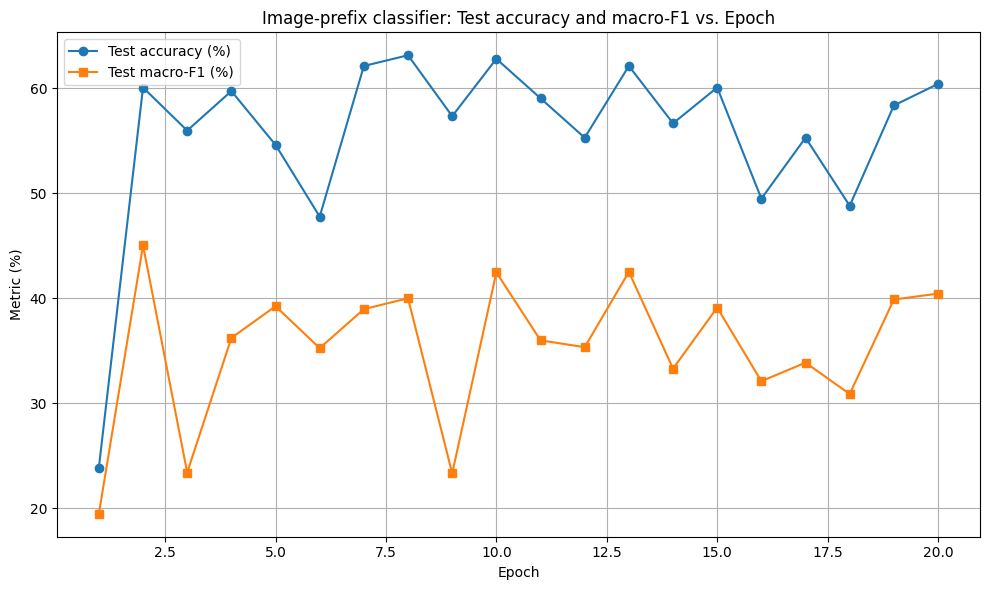

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Epoch indices 1..20
epochs = np.arange(1, 21)

# From your console log (image-prefix-only run)
train_loss = [
    1.3709, 0.7223, 0.6727, 0.6213, 0.4727,
    0.4475, 0.4360, 0.4000, 0.4946, 0.4982,
    0.3401, 0.3782, 0.3925, 0.3024, 0.4207,
    0.2434, 0.3196, 0.3906, 0.2028, 0.2709,
]

test_acc = [  # in %
    23.89, 60.07, 55.97, 59.73, 54.61,
    47.78, 62.12, 63.14, 57.34, 62.80,
    59.04, 55.29, 62.12, 56.66, 60.07,
    49.49, 55.29, 48.81, 58.36, 60.41,
]

test_macro_f1 = [  # in %
    19.49, 45.04, 23.42, 36.23, 39.25,
    35.26, 38.97, 40.01, 23.34, 42.47,
    36.00, 35.35, 42.52, 33.31, 39.12,
    32.11, 33.88, 30.89, 39.89, 40.45,
]

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, marker='o', label='Train loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Image-prefix classifier: Train loss vs. Epoch')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(epochs, test_acc, marker='o', label='Test accuracy (%)')
plt.plot(epochs, test_macro_f1, marker='s', label='Test macro-F1 (%)')
plt.xlabel('Epoch')
plt.ylabel('Metric (%)')
plt.title('Image-prefix classifier: Test accuracy and macro-F1 vs. Epoch')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

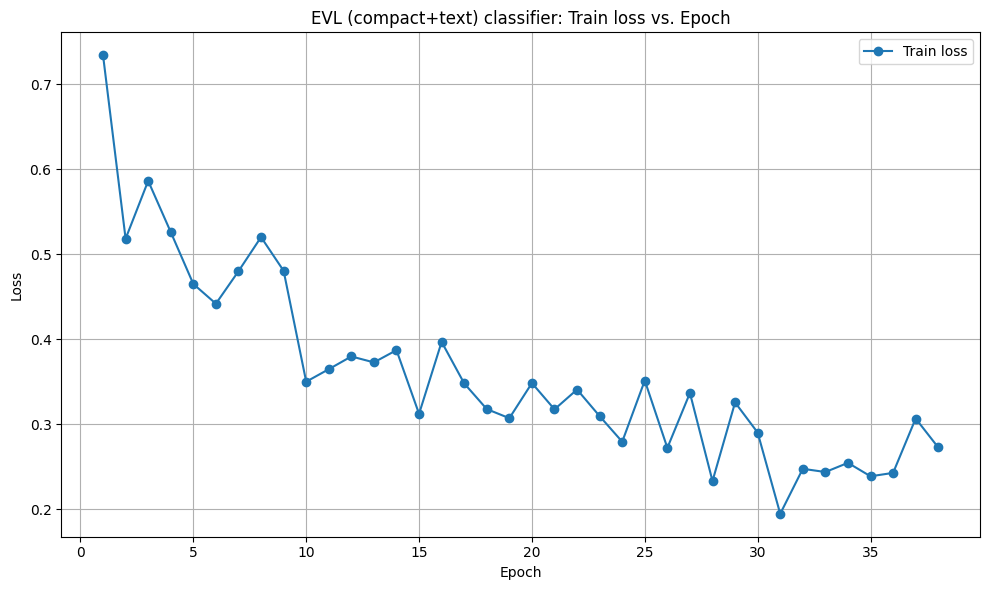

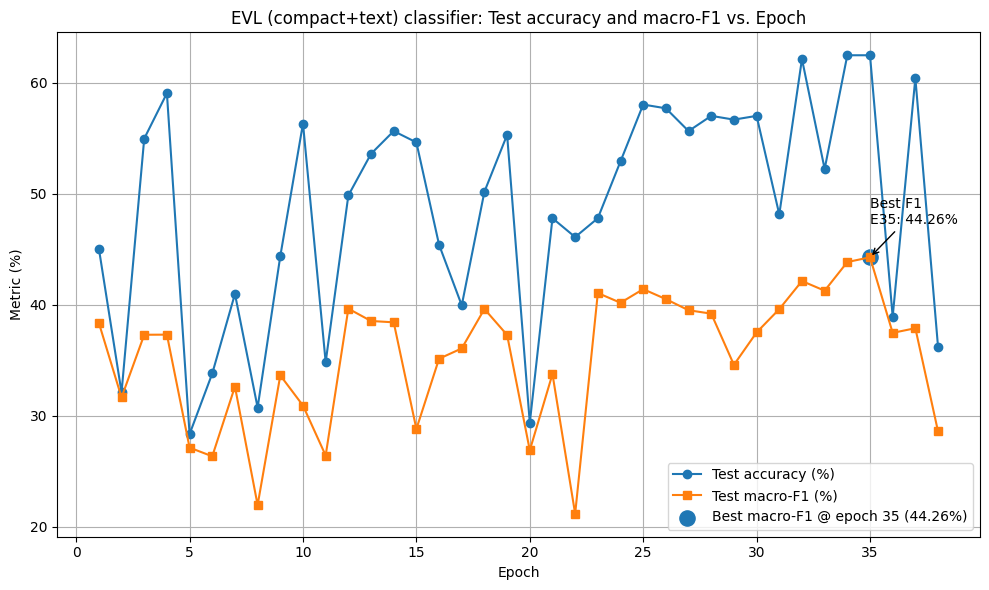

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# EVL (compact+text) run
# NOTE: your log is complete through Epoch 38; Epoch 39/40 aren't fully shown in the snippet.
train_loss = [
    # 1..20
    0.7340, 0.5183, 0.5863, 0.5261, 0.4651,
    0.4419, 0.4801, 0.5202, 0.4806, 0.3502,
    0.3649, 0.3799, 0.3729, 0.3873, 0.3124,
    0.3970, 0.3482, 0.3180, 0.3073, 0.3486,
    # 21..38
    0.3177, 0.3410, 0.3097, 0.2796, 0.3516,
    0.2724, 0.3369, 0.2334, 0.3258, 0.2904,
    0.1949, 0.2478, 0.2440, 0.2548, 0.2390,
    0.2430, 0.3069, 0.2729,
]

test_acc = [  # in %
    # 1..20
    45.05, 32.08, 54.95, 59.04, 28.33,
    33.79, 40.96, 30.72, 44.37, 56.31,
    34.81, 49.83, 53.58, 55.63, 54.61,
    45.39, 39.93, 50.17, 55.29, 29.35,
    # 21..38
    47.78, 46.08, 47.78, 52.90, 58.02,
    57.68, 55.63, 57.00, 56.66, 57.00,
    48.12, 62.12, 52.22, 62.46, 62.46,
    38.91, 60.41, 36.18,
]

test_macro_f1 = [  # in %
    # 1..20
    38.35, 31.63, 37.28, 37.29, 27.11,
    26.33, 32.61, 21.94, 33.62, 30.90,
    26.40, 39.63, 38.52, 38.40, 28.79,
    35.12, 36.05, 39.60, 37.26, 26.87,
    # 21..38
    33.74, 21.15, 41.04, 40.16, 41.39,
    40.49, 39.49, 39.18, 34.57, 37.49,
    39.59, 42.12, 41.25, 43.83, 44.26,
    37.45, 37.87, 28.57,
]

epochs = np.arange(1, len(train_loss) + 1)

# --- Plot 1: train loss ---
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, marker='o', label='Train loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('EVL (compact+text) classifier: Train loss vs. Epoch')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# --- Plot 2: test metrics ---
plt.figure(figsize=(10, 6))
plt.plot(epochs, test_acc, marker='o', label='Test accuracy (%)')
plt.plot(epochs, test_macro_f1, marker='s', label='Test macro-F1 (%)')

# optional: highlight best macro-F1 epoch
best_idx = int(np.argmax(test_macro_f1))
best_epoch = epochs[best_idx]
best_f1 = test_macro_f1[best_idx]
plt.scatter([best_epoch], [best_f1], s=120, label=f'Best macro-F1 @ epoch {best_epoch} ({best_f1:.2f}%)')
plt.annotate(f'Best F1\nE{best_epoch}: {best_f1:.2f}%',
             xy=(best_epoch, best_f1),
             xytext=(best_epoch, best_f1 + 3),
             arrowprops=dict(arrowstyle='->'))

plt.xlabel('Epoch')
plt.ylabel('Metric (%)')
plt.title('EVL (compact+text) classifier: Test accuracy and macro-F1 vs. Epoch')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



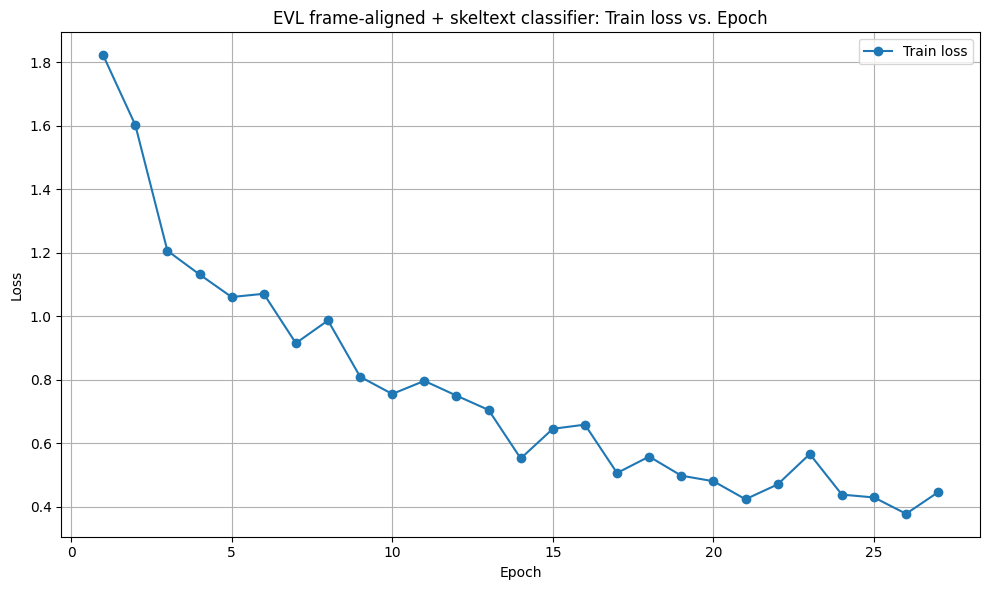

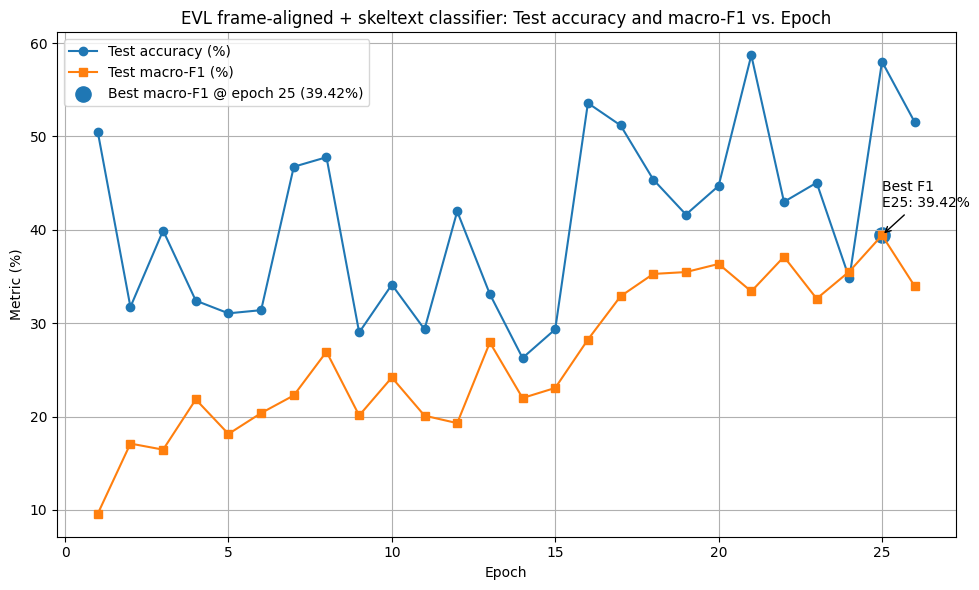

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# EVL-framewise (frame-aligned + skeltext) run
# NOTE: your snippet has full metrics through Epoch 26.
# Epoch 27 has train loss shown, but test acc / macro-F1 lines are not included yet, so we store them as NaN for now.

train_loss = [
    # 1..20
    1.8222, 1.6027, 1.2064, 1.1319, 1.0607,
    1.0709, 0.9154, 0.9869, 0.8096, 0.7553,
    0.7966, 0.7501, 0.7050, 0.5522, 0.6456,
    0.6587, 0.5064, 0.5582, 0.4980, 0.4805,
    # 21..26
    0.4237, 0.4705, 0.5661, 0.4383, 0.4294,
    0.3779,
    # 27 (metrics missing in snippet)
    0.4463,
]

test_acc = [  # in %
    # 1..20
    50.51, 31.74, 39.93, 32.42, 31.06,
    31.40, 46.76, 47.78, 29.01, 34.13,
    29.35, 41.98, 33.11, 26.28, 29.35,
    53.58, 51.19, 45.39, 41.64, 44.71,
    # 21..26
    58.70, 43.00, 45.05, 34.81, 58.02,
    51.54,
    # 27
    np.nan,
]

test_macro_f1 = [  # in %
    # 1..20
    9.59, 17.11, 16.46, 21.84, 18.14,
    20.38, 22.27, 26.95, 20.12, 24.19,
    20.10, 19.30, 27.94, 21.99, 23.07,
    28.25, 32.89, 35.28, 35.48, 36.35,
    # 21..26
    33.41, 37.12, 32.63, 35.54, 39.42,
    33.97,
    # 27
    np.nan,
]

epochs = np.arange(1, len(train_loss) + 1)

# --- Plot 1: train loss ---
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, marker='o', label='Train loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('EVL frame-aligned + skeltext classifier: Train loss vs. Epoch')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# --- Plot 2: test metrics ---
plt.figure(figsize=(10, 6))
plt.plot(epochs, test_acc, marker='o', label='Test accuracy (%)')
plt.plot(epochs, test_macro_f1, marker='s', label='Test macro-F1 (%)')

# highlight best macro-F1 (ignoring NaNs)
best_idx = int(np.nanargmax(test_macro_f1))
best_epoch = epochs[best_idx]
best_f1 = float(test_macro_f1[best_idx])
plt.scatter([best_epoch], [best_f1], s=120, label=f'Best macro-F1 @ epoch {best_epoch} ({best_f1:.2f}%)')
plt.annotate(
    f'Best F1\nE{best_epoch}: {best_f1:.2f}%',
    xy=(best_epoch, best_f1),
    xytext=(best_epoch, best_f1 + 3),
    arrowprops=dict(arrowstyle='->')
)

# optional: mark resume boundary (epoch 20 -> 21)
# plt.axvline(20.5, linestyle='--', linewidth=1, label='Resume boundary (20→21)')

plt.xlabel('Epoch')
plt.ylabel('Metric (%)')
plt.title('EVL frame-aligned + skeltext classifier: Test accuracy and macro-F1 vs. Epoch')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


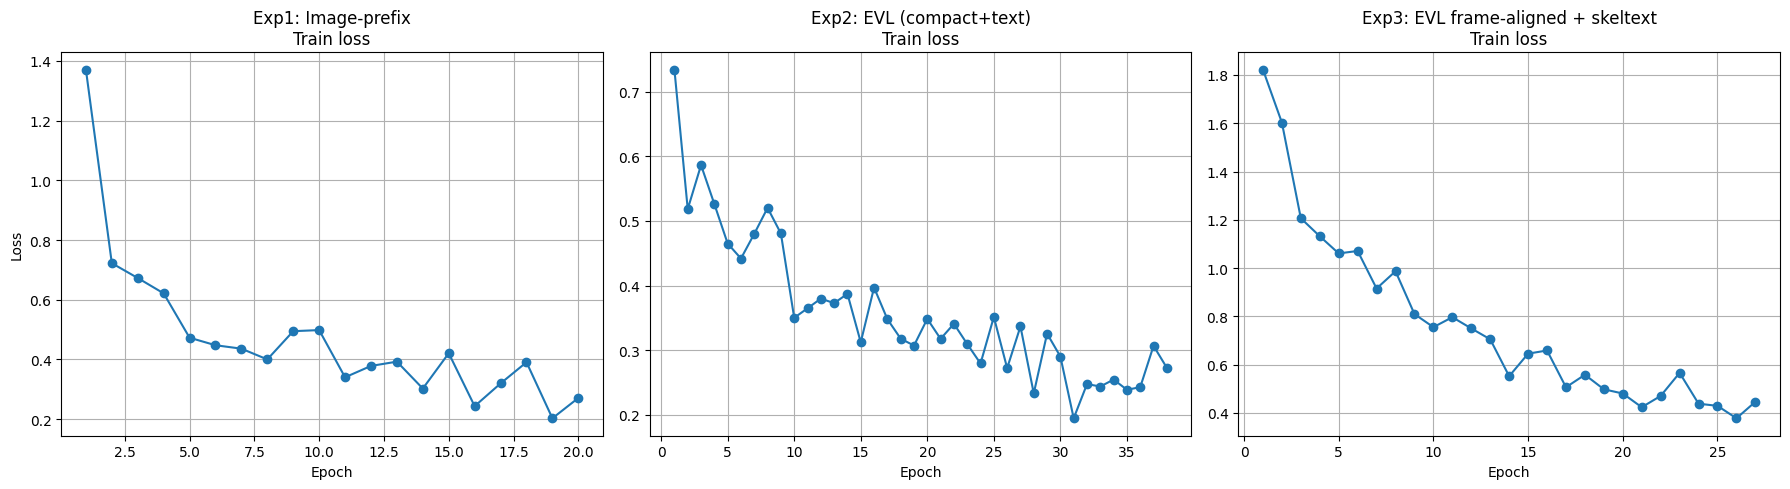

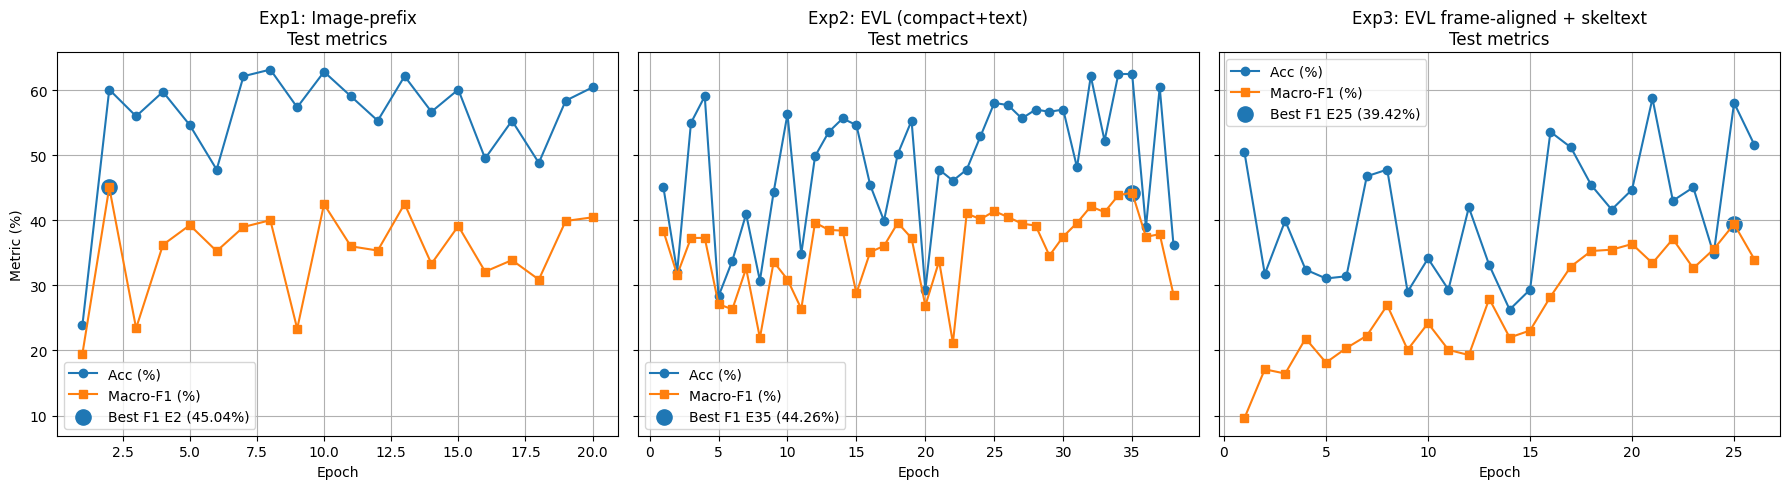

=== Best Macro-F1 by experiment ===
Exp1 (Image-prefix):             best macro-F1 = 45.04% @ epoch 2
Exp2 (EVL compact+text):         best macro-F1 = 44.26% @ epoch 35
Exp3 (EVL frame-aligned+skeltext): best macro-F1 = 39.42% @ epoch 25


In [7]:
import matplotlib.pyplot as plt
import numpy as np

# =========================
# Exp 1) Image-prefix only
# =========================
train_loss_1 = [
    1.3709, 0.7223, 0.6727, 0.6213, 0.4727,
    0.4475, 0.4360, 0.4000, 0.4946, 0.4982,
    0.3401, 0.3782, 0.3925, 0.3024, 0.4207,
    0.2434, 0.3196, 0.3906, 0.2028, 0.2709,
]
test_acc_1 = [
    23.89, 60.07, 55.97, 59.73, 54.61,
    47.78, 62.12, 63.14, 57.34, 62.80,
    59.04, 55.29, 62.12, 56.66, 60.07,
    49.49, 55.29, 48.81, 58.36, 60.41,
]
test_f1_1 = [
    19.49, 45.04, 23.42, 36.23, 39.25,
    35.26, 38.97, 40.01, 23.34, 42.47,
    36.00, 35.35, 42.52, 33.31, 39.12,
    32.11, 33.88, 30.89, 39.89, 40.45,
]
epochs_1 = np.arange(1, len(train_loss_1) + 1)

# =========================
# Exp 2) EVL (compact+text)
# =========================
train_loss_2 = [
    0.7340, 0.5183, 0.5863, 0.5261, 0.4651,
    0.4419, 0.4801, 0.5202, 0.4806, 0.3502,
    0.3649, 0.3799, 0.3729, 0.3873, 0.3124,
    0.3970, 0.3482, 0.3180, 0.3073, 0.3486,
    0.3177, 0.3410, 0.3097, 0.2796, 0.3516,
    0.2724, 0.3369, 0.2334, 0.3258, 0.2904,
    0.1949, 0.2478, 0.2440, 0.2548, 0.2390,
    0.2430, 0.3069, 0.2729,
]
test_acc_2 = [
    45.05, 32.08, 54.95, 59.04, 28.33,
    33.79, 40.96, 30.72, 44.37, 56.31,
    34.81, 49.83, 53.58, 55.63, 54.61,
    45.39, 39.93, 50.17, 55.29, 29.35,
    47.78, 46.08, 47.78, 52.90, 58.02,
    57.68, 55.63, 57.00, 56.66, 57.00,
    48.12, 62.12, 52.22, 62.46, 62.46,
    38.91, 60.41, 36.18,
]
test_f1_2 = [
    38.35, 31.63, 37.28, 37.29, 27.11,
    26.33, 32.61, 21.94, 33.62, 30.90,
    26.40, 39.63, 38.52, 38.40, 28.79,
    35.12, 36.05, 39.60, 37.26, 26.87,
    33.74, 21.15, 41.04, 40.16, 41.39,
    40.49, 39.49, 39.18, 34.57, 37.49,
    39.59, 42.12, 41.25, 43.83, 44.26,
    37.45, 37.87, 28.57,
]
epochs_2 = np.arange(1, len(train_loss_2) + 1)

# ======================================
# Exp 3) EVL frame-aligned + skeltext
# ======================================
train_loss_3 = [
    1.8222, 1.6027, 1.2064, 1.1319, 1.0607,
    1.0709, 0.9154, 0.9869, 0.8096, 0.7553,
    0.7966, 0.7501, 0.7050, 0.5522, 0.6456,
    0.6587, 0.5064, 0.5582, 0.4980, 0.4805,
    0.4237, 0.4705, 0.5661, 0.4383, 0.4294,
    0.3779, 0.4463,  # epoch 27 train loss known
]
test_acc_3 = [
    50.51, 31.74, 39.93, 32.42, 31.06,
    31.40, 46.76, 47.78, 29.01, 34.13,
    29.35, 41.98, 33.11, 26.28, 29.35,
    53.58, 51.19, 45.39, 41.64, 44.71,
    58.70, 43.00, 45.05, 34.81, 58.02,
    51.54,
    np.nan,  # epoch 27 test metrics not in snippet
]
test_f1_3 = [
    9.59, 17.11, 16.46, 21.84, 18.14,
    20.38, 22.27, 26.95, 20.12, 24.19,
    20.10, 19.30, 27.94, 21.99, 23.07,
    28.25, 32.89, 35.28, 35.48, 36.35,
    33.41, 37.12, 32.63, 35.54, 39.42,
    33.97,
    np.nan,  # epoch 27 test metrics not in snippet
]
epochs_3 = np.arange(1, len(train_loss_3) + 1)

# =========================
# Helper: mark best epoch
# =========================
def best_epoch(y):
    idx = int(np.nanargmax(y))
    return idx + 1, float(y[idx])

# =========================
# FIGURE A: Train loss (side-by-side)
# =========================
fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharey=False)
axs[0].plot(epochs_1, train_loss_1, marker='o')
axs[0].set_title('Exp1: Image-prefix\nTrain loss')
axs[0].set_xlabel('Epoch'); axs[0].set_ylabel('Loss'); axs[0].grid(True)

axs[1].plot(epochs_2, train_loss_2, marker='o')
axs[1].set_title('Exp2: EVL (compact+text)\nTrain loss')
axs[1].set_xlabel('Epoch'); axs[1].grid(True)

axs[2].plot(epochs_3, train_loss_3, marker='o')
axs[2].set_title('Exp3: EVL frame-aligned + skeltext\nTrain loss')
axs[2].set_xlabel('Epoch'); axs[2].grid(True)

plt.tight_layout()
plt.show()

# =========================
# FIGURE B: Test metrics (side-by-side)
# =========================
fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Exp 1
axs[0].plot(epochs_1, test_acc_1, marker='o', label='Acc (%)')
axs[0].plot(epochs_1, test_f1_1, marker='s', label='Macro-F1 (%)')
be, bf = best_epoch(test_f1_1)
axs[0].scatter([be], [bf], s=120, label=f'Best F1 E{be} ({bf:.2f}%)')
axs[0].set_title('Exp1: Image-prefix\nTest metrics')
axs[0].set_xlabel('Epoch'); axs[0].set_ylabel('Metric (%)'); axs[0].grid(True)
axs[0].legend()

# Exp 2
axs[1].plot(epochs_2, test_acc_2, marker='o', label='Acc (%)')
axs[1].plot(epochs_2, test_f1_2, marker='s', label='Macro-F1 (%)')
be, bf = best_epoch(test_f1_2)
axs[1].scatter([be], [bf], s=120, label=f'Best F1 E{be} ({bf:.2f}%)')
axs[1].set_title('Exp2: EVL (compact+text)\nTest metrics')
axs[1].set_xlabel('Epoch'); axs[1].grid(True)
axs[1].legend()

# Exp 3
axs[2].plot(epochs_3, test_acc_3, marker='o', label='Acc (%)')
axs[2].plot(epochs_3, test_f1_3, marker='s', label='Macro-F1 (%)')
be, bf = best_epoch(test_f1_3)
axs[2].scatter([be], [bf], s=120, label=f'Best F1 E{be} ({bf:.2f}%)')
axs[2].set_title('Exp3: EVL frame-aligned + skeltext\nTest metrics')
axs[2].set_xlabel('Epoch'); axs[2].grid(True)
axs[2].legend()

plt.tight_layout()
plt.show()

# =========================
# Optional: quick numeric summary
# =========================
print("=== Best Macro-F1 by experiment ===")
be1, bf1 = best_epoch(test_f1_1)
be2, bf2 = best_epoch(test_f1_2)
be3, bf3 = best_epoch(test_f1_3)
print(f"Exp1 (Image-prefix):             best macro-F1 = {bf1:.2f}% @ epoch {be1}")
print(f"Exp2 (EVL compact+text):         best macro-F1 = {bf2:.2f}% @ epoch {be2}")
print(f"Exp3 (EVL frame-aligned+skeltext): best macro-F1 = {bf3:.2f}% @ epoch {be3}")


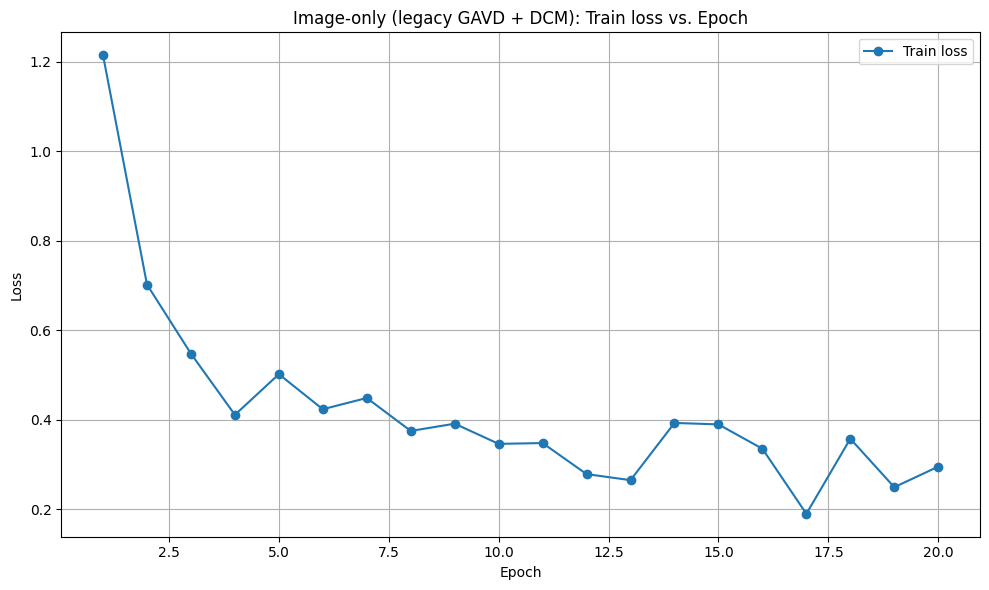

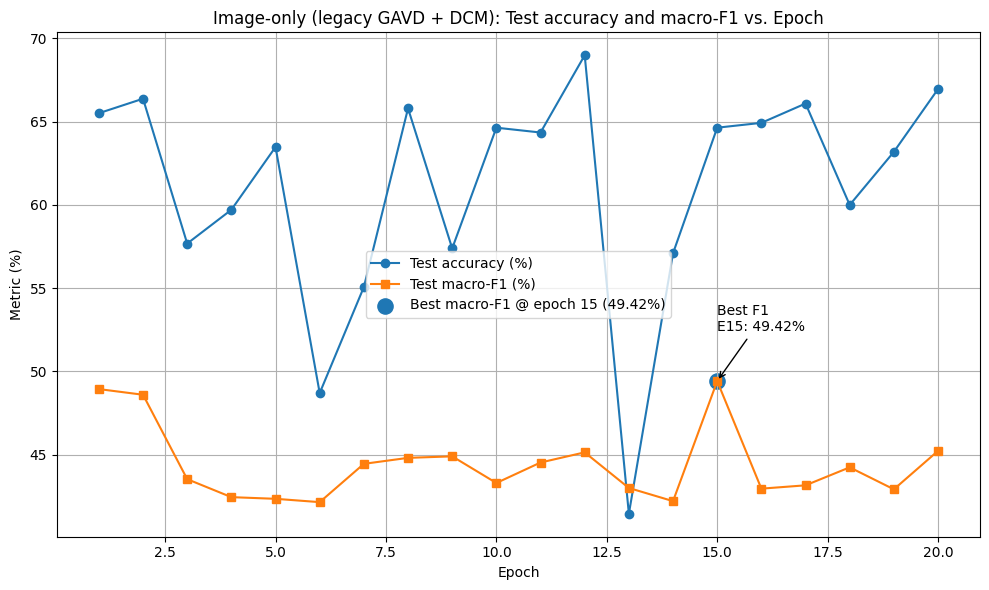

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Image-only (legacy GAVD, includes DCM) — 20 epochs
epochs = np.arange(1, 21)

train_loss = [
    1.2146, 0.7020, 0.5476, 0.4109, 0.5018,
    0.4234, 0.4486, 0.3749, 0.3911, 0.3460,
    0.3478, 0.2784, 0.2649, 0.3928, 0.3895,
    0.3351, 0.1897, 0.3575, 0.2492, 0.2951,
]

test_acc = [  # in %
    65.51, 66.38, 57.68, 59.71, 63.48,
    48.70, 55.07, 65.80, 57.39, 64.64,
    64.35, 68.99, 41.45, 57.10, 64.64,
    64.93, 66.09, 60.00, 63.19, 66.96,
]

test_macro_f1 = [  # in %
    48.94, 48.60, 43.53, 42.45, 42.35,
    42.15, 44.45, 44.81, 44.90, 43.30,
    44.53, 45.14, 43.00, 42.21, 49.42,
    42.96, 43.16, 44.24, 42.92, 45.23,
]

# --- Plot 1: train loss ---
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, marker='o', label='Train loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Image-only (legacy GAVD + DCM): Train loss vs. Epoch')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# --- Plot 2: test metrics ---
plt.figure(figsize=(10, 6))
plt.plot(epochs, test_acc, marker='o', label='Test accuracy (%)')
plt.plot(epochs, test_macro_f1, marker='s', label='Test macro-F1 (%)')

best_idx = int(np.argmax(test_macro_f1))
best_epoch = epochs[best_idx]
best_f1 = test_macro_f1[best_idx]
plt.scatter([best_epoch], [best_f1], s=120,
            label=f'Best macro-F1 @ epoch {best_epoch} ({best_f1:.2f}%)')
plt.annotate(f'Best F1\nE{best_epoch}: {best_f1:.2f}%',
             xy=(best_epoch, best_f1),
             xytext=(best_epoch, best_f1 + 3),
             arrowprops=dict(arrowstyle='->'))

plt.xlabel('Epoch')
plt.ylabel('Metric (%)')
plt.title('Image-only (legacy GAVD + DCM): Test accuracy and macro-F1 vs. Epoch')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


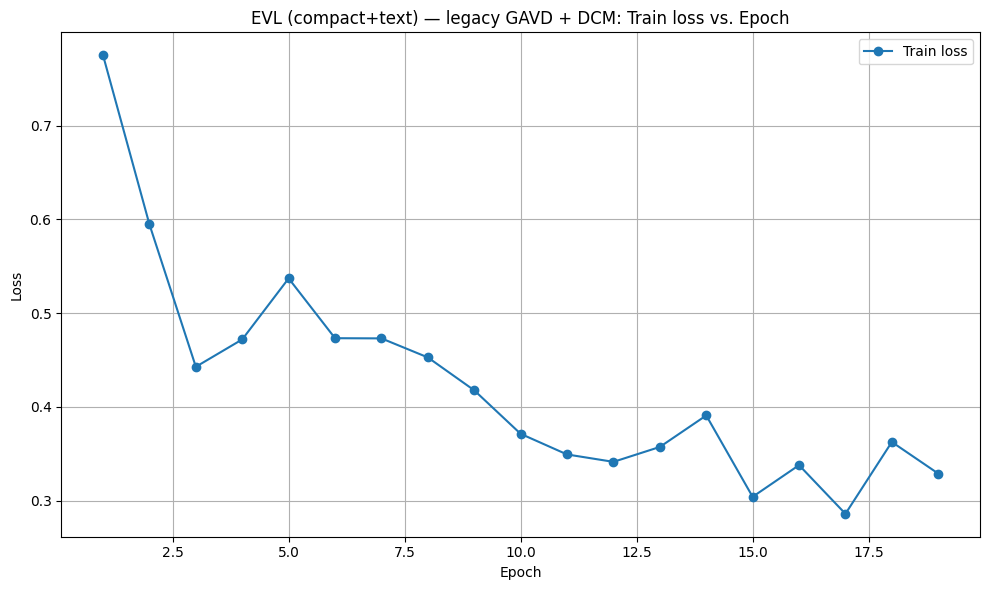

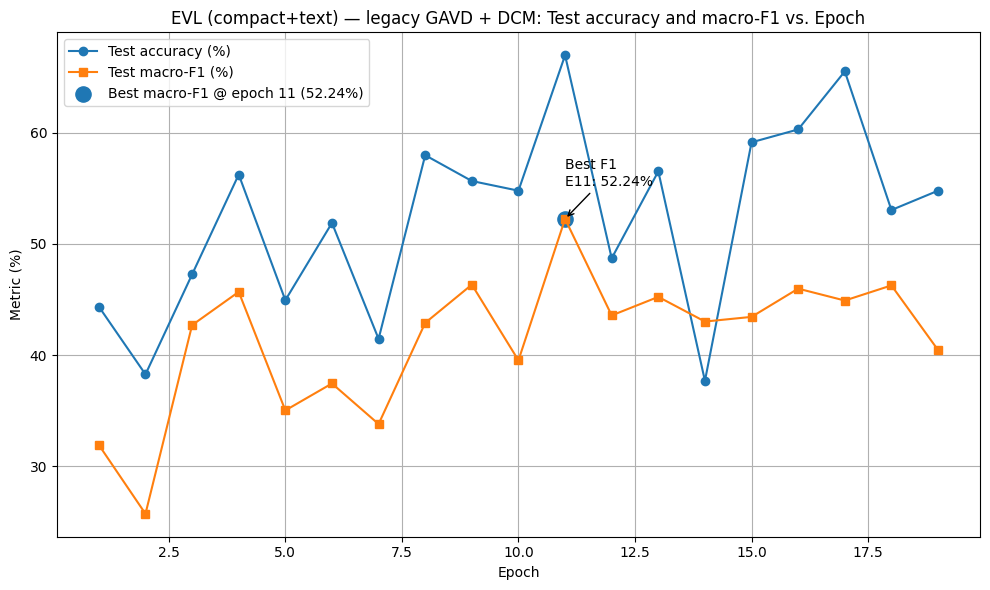

Best macro-F1 = 52.24% @ epoch 11


In [2]:
import matplotlib.pyplot as plt
import numpy as np

# EVL (compact+text) — legacy GAVD (+ DCM), log currently complete through Epoch 19
epochs = np.arange(1, 20)  # 1..19

train_loss = [
    0.7750, 0.5946, 0.4427, 0.4719, 0.5370,
    0.4732, 0.4730, 0.4527, 0.4176, 0.3712,
    0.3492, 0.3413, 0.3572, 0.3908, 0.3040,
    0.3378, 0.2859, 0.3625, 0.3288,
]

test_acc = [  # in %
    44.35, 38.26, 47.25, 56.23, 44.93,
    51.88, 41.45, 57.97, 55.65, 54.78,
    66.96, 48.70, 56.52, 37.68, 59.13,
    60.29, 65.51, 53.04, 54.78,
]

test_macro_f1 = [  # in %
    31.91, 25.72, 42.69, 45.68, 35.02,
    37.44, 33.79, 42.89, 46.33, 39.52,
    52.24, 43.56, 45.23, 43.01, 43.43,
    45.97, 44.90, 46.26, 40.45,
]

# --- Plot 1: train loss ---
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, marker='o', label='Train loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('EVL (compact+text) — legacy GAVD + DCM: Train loss vs. Epoch')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# --- Plot 2: test metrics ---
plt.figure(figsize=(10, 6))
plt.plot(epochs, test_acc, marker='o', label='Test accuracy (%)')
plt.plot(epochs, test_macro_f1, marker='s', label='Test macro-F1 (%)')

best_idx = int(np.argmax(test_macro_f1))
best_epoch = epochs[best_idx]
best_f1 = test_macro_f1[best_idx]
plt.scatter([best_epoch], [best_f1], s=120,
            label=f'Best macro-F1 @ epoch {best_epoch} ({best_f1:.2f}%)')
plt.annotate(f'Best F1\nE{best_epoch}: {best_f1:.2f}%',
             xy=(best_epoch, best_f1),
             xytext=(best_epoch, best_f1 + 3),
             arrowprops=dict(arrowstyle='->'))

plt.xlabel('Epoch')
plt.ylabel('Metric (%)')
plt.title('EVL (compact+text) — legacy GAVD + DCM: Test accuracy and macro-F1 vs. Epoch')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

print(f"Best macro-F1 = {best_f1:.2f}% @ epoch {best_epoch}")


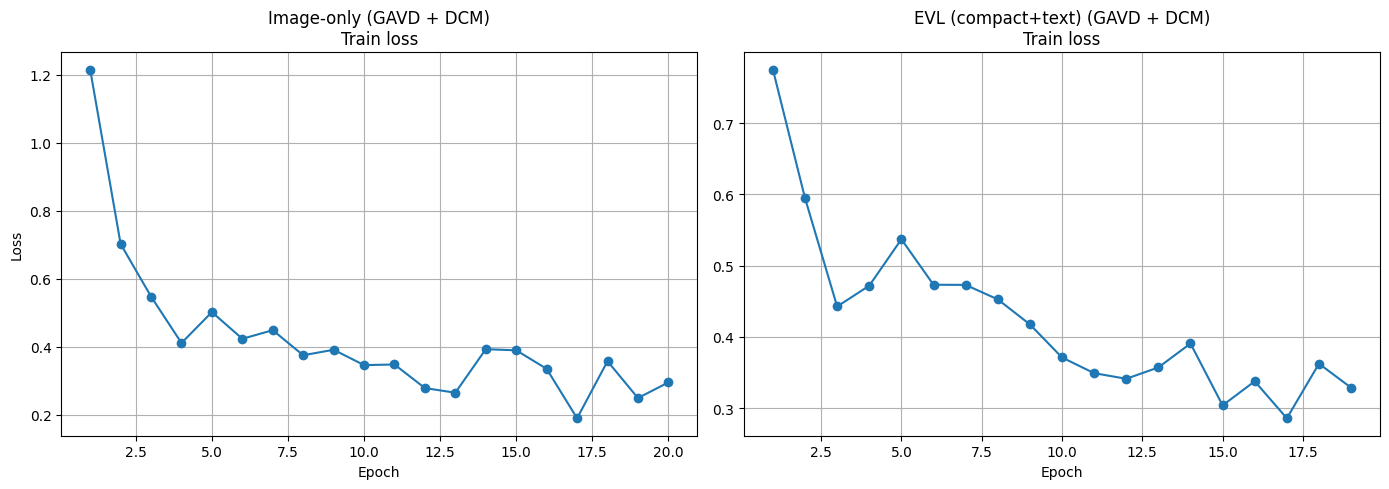

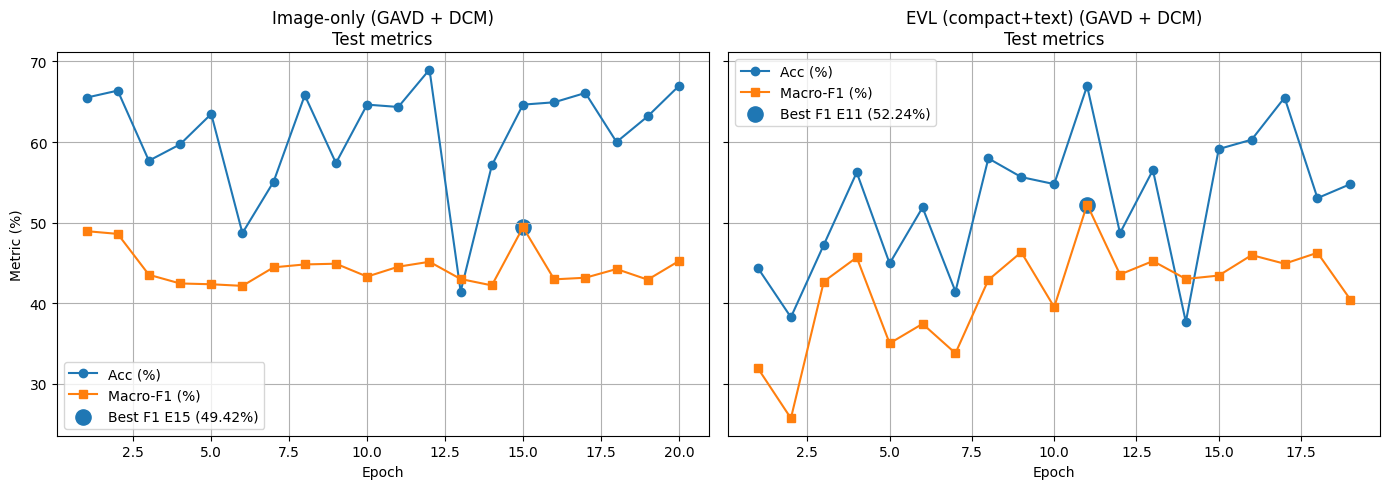

=== Best Macro-F1 (GAVD + DCM) ===
Image-only:        best macro-F1 = 49.42% @ epoch 15
EVL compact+text:  best macro-F1 = 52.24% @ epoch 11


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# ============================================================
# Two experiments on (legacy/new) GAVD + DCM dataset
#   A) Image-only (20 epochs)
#   B) EVL (compact+text) (currently pasted through epoch 19)
# ============================================================

# ---------- A) Image-only (legacy GAVD + DCM) ----------
train_loss_A = [
    1.2146, 0.7020, 0.5476, 0.4109, 0.5018,
    0.4234, 0.4486, 0.3749, 0.3911, 0.3460,
    0.3478, 0.2784, 0.2649, 0.3928, 0.3895,
    0.3351, 0.1897, 0.3575, 0.2492, 0.2951,
]
test_acc_A = [
    65.51, 66.38, 57.68, 59.71, 63.48,
    48.70, 55.07, 65.80, 57.39, 64.64,
    64.35, 68.99, 41.45, 57.10, 64.64,
    64.93, 66.09, 60.00, 63.19, 66.96,
]
test_f1_A = [
    48.94, 48.60, 43.53, 42.45, 42.35,
    42.15, 44.45, 44.81, 44.90, 43.30,
    44.53, 45.14, 43.00, 42.21, 49.42,
    42.96, 43.16, 44.24, 42.92, 45.23,
]
epochs_A = np.arange(1, len(train_loss_A) + 1)

# ---------- B) EVL (compact+text) (legacy GAVD + DCM) ----------
train_loss_B = [
    0.7750, 0.5946, 0.4427, 0.4719, 0.5370,
    0.4732, 0.4730, 0.4527, 0.4176, 0.3712,
    0.3492, 0.3413, 0.3572, 0.3908, 0.3040,
    0.3378, 0.2859, 0.3625, 0.3288,
]
test_acc_B = [
    44.35, 38.26, 47.25, 56.23, 44.93,
    51.88, 41.45, 57.97, 55.65, 54.78,
    66.96, 48.70, 56.52, 37.68, 59.13,
    60.29, 65.51, 53.04, 54.78,
]
test_f1_B = [
    31.91, 25.72, 42.69, 45.68, 35.02,
    37.44, 33.79, 42.89, 46.33, 39.52,
    52.24, 43.56, 45.23, 43.01, 43.43,
    45.97, 44.90, 46.26, 40.45,
]
epochs_B = np.arange(1, len(train_loss_B) + 1)

def best_epoch(y):
    idx = int(np.nanargmax(y))
    return idx + 1, float(y[idx])

# ============================================================
# FIGURE 1: Train loss side-by-side
# ============================================================
fig, axs = plt.subplots(1, 2, figsize=(14, 5), sharey=False)

axs[0].plot(epochs_A, train_loss_A, marker='o')
axs[0].set_title('Image-only (GAVD + DCM)\nTrain loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].grid(True)

axs[1].plot(epochs_B, train_loss_B, marker='o')
axs[1].set_title('EVL (compact+text) (GAVD + DCM)\nTrain loss')
axs[1].set_xlabel('Epoch')
axs[1].grid(True)

plt.tight_layout()
plt.show()

# ============================================================
# FIGURE 2: Test metrics side-by-side
# ============================================================
fig, axs = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Image-only
axs[0].plot(epochs_A, test_acc_A, marker='o', label='Acc (%)')
axs[0].plot(epochs_A, test_f1_A, marker='s', label='Macro-F1 (%)')
be, bf = best_epoch(test_f1_A)
axs[0].scatter([be], [bf], s=120, label=f'Best F1 E{be} ({bf:.2f}%)')
axs[0].set_title('Image-only (GAVD + DCM)\nTest metrics')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Metric (%)')
axs[0].grid(True)
axs[0].legend()

# EVL compact+text
axs[1].plot(epochs_B, test_acc_B, marker='o', label='Acc (%)')
axs[1].plot(epochs_B, test_f1_B, marker='s', label='Macro-F1 (%)')
be, bf = best_epoch(test_f1_B)
axs[1].scatter([be], [bf], s=120, label=f'Best F1 E{be} ({bf:.2f}%)')
axs[1].set_title('EVL (compact+text) (GAVD + DCM)\nTest metrics')
axs[1].set_xlabel('Epoch')
axs[1].grid(True)
axs[1].legend()

plt.tight_layout()
plt.show()

# ============================================================
# Quick numeric summary
# ============================================================
beA, bfA = best_epoch(test_f1_A)
beB, bfB = best_epoch(test_f1_B)

print("=== Best Macro-F1 (GAVD + DCM) ===")
print(f"Image-only:        best macro-F1 = {bfA:.2f}% @ epoch {beA}")
print(f"EVL compact+text:  best macro-F1 = {bfB:.2f}% @ epoch {beB}")
